# Tweeter analysis

> Data available from: https://www.kaggle.com/datasets/kazanova/sentiment140

In [1]:
import datetime
import matplotlib.pyplot as plt
import openai
import os
import pandas as pd
import seaborn as sns
import sys

from dotenv import load_dotenv
from tqdm import tqdm

In [2]:
load_dotenv("azure.env")

# Azure Open AI
openai.api_type: str = "azure"
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_base = os.getenv("OPENAI_API_BASE")
openai.api_version = os.getenv("OPENAI_API_VERSION")

print("Open AI version:", openai.__version__)

Open AI version: 0.28.1


In [3]:
print("Today is:", datetime.datetime.today().strftime("%d-%b-%Y %H:%M:%S"))

Today is: 12-Oct-2023 14:53:27


In [4]:
sys.version

'3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'

## Dataset

In [5]:
nRowsRead = 300  # specify 'None' if want to read whole file

column_names = [
    "col1",
    "id",
    "datetime",
    "query",
    "user",
    "text",
]  # Replace with the actual column names

df = pd.read_csv(
    "training.1600000.processed.noemoticon.csv",
    nrows=nRowsRead,
    header=None,
    names=column_names,
)

In [6]:
df = df.drop("col1", axis=1)
df = df.drop("query", axis=1)

In [7]:
df["date"] = pd.to_datetime(df["datetime"], format="mixed")
df = df.drop("datetime", axis=1)

In [8]:
df

,id,user,text,date
0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45
1,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49
2,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53
3,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57
4,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57
...,...,...,...,...
295,1467889251,krissivee,@aaronrva is in the bathroom and i have to pee...,2009-04-06 22:40:24
296,1467889334,Angela004,@ashleyskyy but I wanted a margarita too!,2009-04-06 22:40:26
297,1467889574,Nrose09,@KourtneyKardash yup night workouts r the wors...,2009-04-06 22:40:30
298,1467889791,jennhelvering,Just called Hillsong again - they said they co...,2009-04-06 22:40:33


In [9]:
def get_sentiment(text):
    """
    Sentiment analysis with Azure Open AI
    """

    prompt = """Classify the sentiment of the following tweet as positive, negative, or neutral. 
    text: {}
    sentiment: """.format(
        text
    )

    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=15,
        temperature=0,
    )

    sentiment = response["choices"][0]["text"].replace(" ", "")

    return sentiment

In [10]:
get_sentiment("Hello")

'Neutral'

In [11]:
get_sentiment("Azure Open AI is great")

'Positive'

In [12]:
get_sentiment("I am not happy about the hotel")

'Negative'

## Getting the sentiment on all text from the df

In [13]:
tqdm.pandas()

try:
    df["sentiment"] = df["text"].progress_apply(get_sentiment)

except:
    pass

100%|██████████| 300/300 [01:51<00:00,  2.69it/s]


In [14]:
df.head()

,id,user,text,date,sentiment
0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,Neutral
1,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,Negative
2,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,Neutral
3,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,Negative
4,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Negative


In [15]:
df.shape

(300, 5)

In [16]:
df["user"].value_counts(sort=True)

user
Dogbook           2
gregcronin        2
Artiel87          2
AmyJade           2
treehugger25      2
                 ..
wireandroses      1
jess_higley       1
missannabanana    1
Zella17           1
FeedMeTrance      1
Name: count, Length: 291, dtype: int64

<Axes: xlabel='sentiment'>

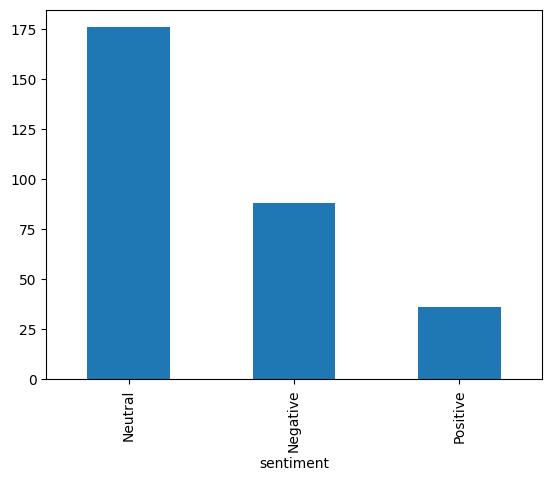

In [17]:
df["sentiment"].value_counts(sort=True).plot.bar()

In [18]:
positive_tweets = df[df["sentiment"] == "Positive"]

for i, pos in enumerate(positive_tweets["text"][:10]):  # Limit to the first 10 items
    print(i, " - ", pos)

0  -  @iamjazzyfizzle I wish I got to watch it with you!! I miss you and @iamlilnicki  how was the premiere?!
1  -  @LettyA ahh ive always wanted to see rent  love the soundtrack!!
2  -  @julieebaby awe i love you too!!!! 1 am here  i miss you
3  -  just leaving the parking lot of work! 
4  -  @katortiz  Not forever... See you soon!
5  -  @ninjen I'm sure you're right...    I need to start working out with you and the Nikster... Or Jared at least!
6  -  @statravelAU just got ur newsletter, those fares really are unbelievable, shame I already booked and paid for mine 
7  -  @januarycrimson Sorry, babe!!  My fam annoys me too. Thankfully, they're asleep right now. Muahaha. *evil laugh*
8  -  wednesday my b-day! don't know what 2 do!! 
9  -  Strider is a sick little puppy  http://apps.facebook.com/dogbook/profile/view/5248435


In [19]:
negative_tweets = df[df["sentiment"] == "Negative"]

for i, pos in enumerate(negative_tweets["text"][:10]):  # Limit to the first 10 items
    print(i, " - ", pos)

0  -  is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
1  -  my whole body feels itchy and like its on fire 
2  -  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
3  -  @Tatiana_K nope they didn't have it 
4  -  @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .
5  -  @smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.
6  -  this week is not going as i had hoped 
7  -  I hate when I have to call and wake people up 
8  -  Just going to cry myself to sleep after watching Marley and Me.  
9  -  im sad now  Miss.Lilly


In [20]:
neutral_tweets = df[df["sentiment"] == "Neutral"]

for i, pos in enumerate(neutral_tweets["text"][:10]):  # Limit to the first 10 items
    print(i, " - ", pos)

0  -  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
1  -  @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
2  -  @Kwesidei not the whole crew 
3  -  Need a hug 
4  -  @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
5  -  @twittera que me muera ? 
6  -  spring break in plain city... it's snowing 
7  -  I just re-pierced my ears 
8  -  @octolinz16 It it counts, idk why I did either. you never talk to me anymore 
9  -  Hollis' death scene will hurt me severely to watch on film  wry is directors cut not out now?


In [21]:
df["positive_sent"] = (df["sentiment"] == "Positive").cumsum()
df["negative_sent"] = (df["sentiment"] == "Negative").cumsum()
df["neutral_sent"] = (df["sentiment"] == "Neutral").cumsum()

df.head()

,id,user,text,date,sentiment,positive_sent,negative_sent,neutral_sent
0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,Neutral,0,0,1
1,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,Negative,0,1,1
2,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,Neutral,0,1,2
3,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,Negative,0,2,2
4,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Negative,0,3,2


In [22]:
row_sum = df[["positive_sent", "negative_sent", "neutral_sent"]].sum(axis=1)

df["positive_sent"] = df["positive_sent"] / row_sum * 100
df["negative_sent"] = df["negative_sent"] / row_sum * 100
df["neutral_sent"] = df["neutral_sent"] / row_sum * 100

df.head()

,id,user,text,date,sentiment,positive_sent,negative_sent,neutral_sent
0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,Neutral,0.0,0.000000,100.000000
1,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,Negative,0.0,50.000000,50.000000
2,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,Neutral,0.0,33.333333,66.666667
3,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,Negative,0.0,50.000000,50.000000
4,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Negative,0.0,60.000000,40.000000


In [23]:
window_size = 10

time_series_df = df.iloc[window_size - 1 :: window_size]
time_series_df.head()

,id,user,text,date,sentiment,positive_sent,negative_sent,neutral_sent
9,1467812025,mimismo,@twittera que me muera ?,2009-04-06 22:20:09,Neutral,0.000000,40.000000,60.000000
19,1467813782,gi_gi_bee,@FakerPattyPattz Oh dear. Were you drinking ou...,2009-04-06 22:20:34,Neutral,10.000000,30.000000,60.000000
29,1467815753,BaptisteTheFool,Meh... Almost Lover is the exception... this t...,2009-04-06 22:21:04,Negative,6.666667,36.666667,56.666667
39,1467818007,Anthony_Nguyen,Bed. Class 8-12. Work 12-3. Gym 3-5 or 6. Then...,2009-04-06 22:21:39,Neutral,7.500000,32.500000,60.000000
49,1467820835,cyantist,@tea oh! i'm so sorry i didn't think about th...,2009-04-06 22:22:25,Neutral,6.000000,32.000000,62.000000


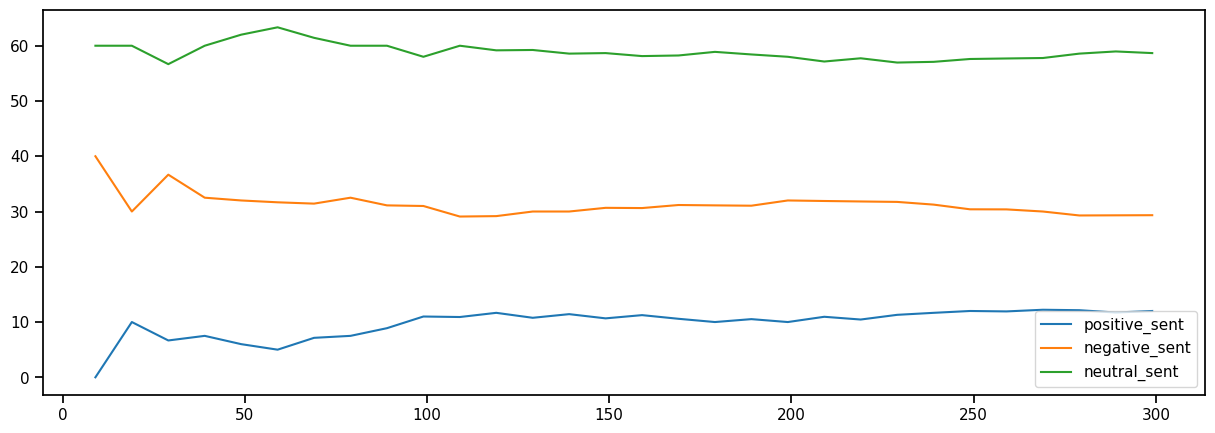

In [24]:
sns.set_context("notebook")

time_series_df.plot(
    y=["positive_sent", "negative_sent", "neutral_sent"], kind="line", figsize=(15, 5)
).legend(loc="lower right")